In [1]:
import numpy as np
import random
import os
np.random.seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)

# Out of vocab issue check

In [2]:
import pandas as pd
train_dataset_df = pd.read_csv('./train_final.csv')
test_dataset_df = pd.read_csv('./eval_final_open.csv')

In [2]:
from transformers import BertTokenizer, ElectraTokenizer
bert_base_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
electra_base_tokenizer = ElectraTokenizer.from_pretrained('google/electra-base-discriminator')

In [25]:
def check_oov(tokenizer):
    """Check if out of vocabulary issues occur when the tokenizer is applied
    """
    unk_idx = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)
    train_ids = [tokenizer.encode(sent, add_special_tokens=True) for sent in train_dataset_df.Sentence]
    train_ids_list = []
    for ids in train_ids:
        train_ids_list.extend(ids)
    train_ids_list = np.array(train_ids_list)
    numOfUnkTokensInTrain = sum(train_ids_list==unk_idx)
    test_ids = [tokenizer.encode(sent, add_special_tokens=True) for sent in test_dataset_df.Sentence]
    test_ids_list = []
    for ids in test_ids:
        test_ids_list.extend(ids)
    test_ids_list = np.array(test_ids_list)
    numOfUnkTokensInTest = sum(test_ids_list==unk_idx)
    print(f"num. unknown tokens in Train dataset: {numOfUnkTokensInTrain}, num. unknown tokens in Test dataset: {numOfUnkTokensInTest}")

In [26]:
check_oov(bert_base_tokenizer)

num. unknown tokens in Train dataset: 0, num. unknown tokens in Test dataset: 0


In [27]:
check_oov(electra_base_tokenizer)

num. unknown tokens in Train dataset: 0, num. unknown tokens in Test dataset: 0


# Duplicated sentence check

In [93]:
# Test example
test_df = pd.DataFrame()
test_df["Sentence"] = [1,2,2,3,3,3,4,4,4,4]
print(test_df.duplicated(["Sentence"])); print()
print(test_df.duplicated(["Sentence"], keep=False)); print()
test_df.drop_duplicates(["Sentence"], inplace=True)
print(test_df.reset_index(drop=True))

0    False
1    False
2     True
3    False
4     True
5     True
6    False
7     True
8     True
9     True
dtype: bool

0    False
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
dtype: bool

   Sentence
0         1
1         2
2         3
3         4


In [75]:
# Check the number of duplicated sentence in dataset
numOfDuplicatedSentInTrain = sum(train_dataset_df.duplicated(["Sentence", "Category"]).values)
numOfDuplicatedSentInTest = sum(test_dataset_df.duplicated(["Sentence"]).values)
print(f"num. duplicated sentence in Train dataset: {numOfDuplicatedSentInTrain}, num. duplicated sentence in Test dataset: {numOfDuplicatedSentInTest}")

num. duplicated sentence in Train dataset: 2981, num. duplicated sentence in Test dataset: 1


In [83]:
# Save the dataset
train_dataset_df.to_csv("./train_drop_duplicates.csv")

In [82]:
# Test example
test_df = pd.DataFrame()
test_df["Sentence"] = [1,2,2,3,3,3,4,4,4,4]
print(test_df.duplicated(["Sentence"])); print()
print(test_df.duplicated(["Sentence"], keep=False)); print()
test_df.drop_duplicates(["Sentence"], inplace=True)
print(test_df.reset_index(drop=True))

0    False
1    False
2     True
3    False
4     True
5     True
6    False
7     True
8     True
9     True
dtype: bool

0    False
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
dtype: bool

   Sentence
0         1
1         2
2         3
3         4


# Difference of max length between Train sentences and Test sentences

In [97]:
def check_max_len(tokenizer):
    encoded_train_dataset = [tokenizer.encode(sent, add_special_tokens=True) for sent in train_dataset_df.Sentence.values]
    train_max_len = max([len(sent) for sent in encoded_train_dataset])
    encoded_test_dataset = [tokenizer.encode(sent, add_special_tokens=True) for sent in test_dataset_df.Sentence.values]
    test_max_len = max([len(sent) for sent in encoded_test_dataset])
    print(f"max length of Train sentences: {train_max_len}, max length of Test sentences: {test_max_len}")

In [98]:
check_max_len(bert_base_tokenizer)

max length of Train sentences: 80, max length of Test sentences: 71


In [99]:
check_max_len(electra_base_tokenizer)

max length of Train sentences: 80, max length of Test sentences: 71


# Distribution of the number of tokens

In [106]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use("ggplot")
train_dataset_df = pd.read_csv('./train_drop_duplicates.csv')

In [101]:
def check_dist_numOfTOkens(tokenizer, dataset):
    encoded_dataset = [tokenizer.encode(sent, add_special_tokens=True) for sent in dataset.Sentence.values]
    bins = np.arange(0,100,5)
    plt.hist([len(sent) for sent in encoded_dataset], bins)
    plt.show()

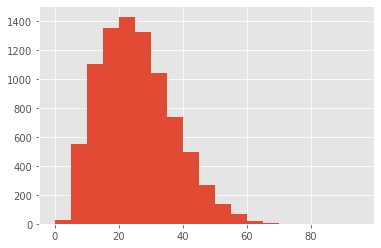

In [102]:
check_dist_numOfTOkens(bert_base_tokenizer, train_dataset_df)

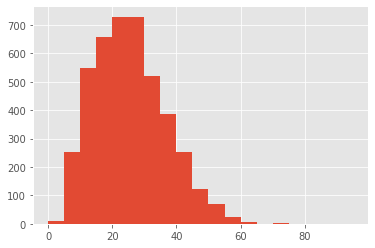

In [103]:
check_dist_numOfTOkens(bert_base_tokenizer, test_dataset_df)

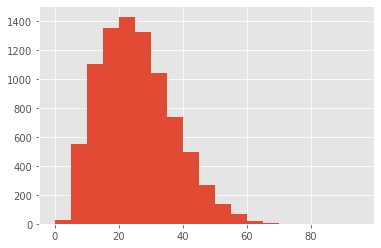

In [104]:
check_dist_numOfTOkens(electra_base_tokenizer, train_dataset_df)

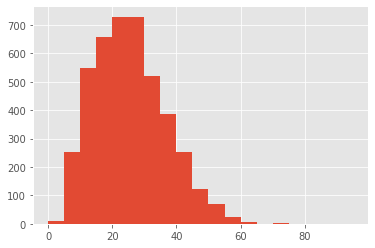

In [105]:
check_dist_numOfTOkens(electra_base_tokenizer, test_dataset_df)

# Regular Expression

In [149]:
train_dataset_df = pd.read_csv('./train_drop_duplicates.csv')

In [141]:
def RegExp(string):
    import re
    string = re.sub(r"-LRB-", " ", string)
    string = re.sub(r"-RRB-", " ", string)
    string = re.sub(r"[^A-Za-z0-9,!?\'\`\.]", " ", string)
    return string

In [153]:
train_dataset_df = pd.read_csv('./train_drop_duplicates.csv')
print(train_dataset_df.Sentence[0])
print(RegExp(train_dataset_df.Sentence[0]))

-LRB- The film -RRB- tackles the topic of relationships in such a straightforward , emotionally honest manner that by the end , it 's impossible to ascertain whether the film is , at its core , deeply pessimistic or quietly hopeful .
  The film   tackles the topic of relationships in such a straightforward , emotionally honest manner that by the end , it 's impossible to ascertain whether the film is , at its core , deeply pessimistic or quietly hopeful .


In [159]:
train_dataset_df = pd.read_csv('./train_drop_duplicates.csv')
train_dataset_df.Sentence = train_dataset_df.Sentence.map(lambda sent: RegExp(sent))
train_dataset_df.drop("Unnamed: 0", axis=1, inplace=True)
train_dataset_df.to_csv("./train_drop_duplicates_regexp_opt_0.csv", index=False)
train_dataset_df

,Id,Category,Sentence
0,0,3,The film tackles the topic of relationship...
1,1,2,"Lavishly , exhilaratingly tasteless ."
2,2,4,It is also beautifully acted .
3,3,1,"But , like Silence , it 's a movie that gets u..."
4,4,2,It 's been made with an innocent yet fervid co...
...,...,...,...
8558,11531,2,If you ignore the cliches and concentrate on C...
8559,11532,3,A macabre and very stylized Swedish fillm abou...
8560,11533,4,"... an eerily suspenseful , deeply absorbing p..."
8561,11537,1,This is n't a movie it 's a symptom .


# Train, Valid Split

In [202]:
def split_and_save_dataset(dataset_df, split_ratio=1):
    from sklearn.model_selection import train_test_split
    split_ratio_ = float(f"0.{split_ratio}")
    X_arr = dataset_df.Sentence.values
    y_arr = dataset_df.Category.values
    train_dataset_df, valid_dataset_df = train_test_split(dataset_df, test_size=split_ratio_, random_state=42, shuffle=True, stratify=y_arr)
    print(f"len_train: {len(train_dataset_df)}, len_valid: {len(valid_dataset_df)}")
    train_dataset_df.to_csv("./train_dd_reopt_0_ratio_"+str(split_ratio)+".csv", index=False)
    valid_dataset_df.to_csv("./valid_dd_reopt_0_ratio_"+str(split_ratio)+".csv", index=False)

In [203]:
full_dataset_df = pd.read_csv('./train_drop_duplicates_regexp_opt_0.csv')

In [204]:
split_and_save_dataset(full_dataset_df, split_ratio=1)

len_train: 7706, len_valid: 857


In [205]:
split_and_save_dataset(full_dataset_df, split_ratio=2)

len_train: 6850, len_valid: 1713


In [206]:
split_and_save_dataset(full_dataset_df, split_ratio=3)

len_train: 5994, len_valid: 2569


In [3]:
full_dataset_df = pd.read_csv('./train_drop_duplicates.csv')
full_dataset_df.drop('Unnamed: 0', axis=1, inplace=True)
full_dataset_df

,Id,Category,Sentence
0,0,3,-LRB- The film -RRB- tackles the topic of rela...
1,1,2,"Lavishly , exhilaratingly tasteless ."
2,2,4,It is also beautifully acted .
3,3,1,"But , like Silence , it 's a movie that gets u..."
4,4,2,It 's been made with an innocent yet fervid co...
...,...,...,...
8558,11531,2,If you ignore the cliches and concentrate on C...
8559,11532,3,A macabre and very stylized Swedish fillm abou...
8560,11533,4,"... an eerily suspenseful , deeply absorbing p..."
8561,11537,1,This is n't a movie ; it 's a symptom .


In [130]:
from sklearn.model_selection import train_test_split
split_ratio = 0.3
X_arr = full_dataset_df.Sentence.values
y_arr = full_dataset_df.Category.values
train_dataset_df, valid_dataset_df = train_test_split(full_dataset_df, test_size=split_ratio, random_state=42, shuffle=True, stratify=y_arr)
print(f"len_train: {len(train_dataset_df)}, len_valid: {len(valid_dataset_df)}")
# train_dataset_df.to_csv("./train_dd_ratio_"+str(3)+".csv", index=False)
# valid_dataset_df.to_csv("./valid_dd_ratio_"+str(3)+".csv", index=False)

len_train: 5994, len_valid: 2569


In [131]:
train_dataset_df

,Id,Category,Sentence
4794,5402,2,near the end takes on a whole other meaning .
8140,10693,2,You really have to salute writer-director Hane...
6093,7226,1,"Often demented in a good way , but it is an un..."
7911,10242,1,A bore that tends to hammer home every one of ...
1696,1767,1,Not that any of us should be complaining when ...
...,...,...,...
1724,1797,4,It 's Quaid who anchors the film with his effo...
7594,9645,1,is an inexpressible and drab wannabe looking f...
635,641,0,This Tuxedo ... should have been sent back to ...
7973,10345,1,With McConaughey in an entirely irony-free zon...


In [93]:
total_set = set(range(len(full_dataset_df)))
duplicated_set = set(duplicated_idx_list)

In [99]:
len(total_set), len(duplicated_set) + len(total_set - duplicated_set)

(8563, 8563)

In [116]:
outer_list = np.array(list(total_set - duplicated_set))
len(outer_list)

7573

In [141]:
duplicated_df = pd.DataFrame(full_dataset_df.values[duplicated_idx_list], columns=["Id", "Category", "Sentence"])
duplicated_df

,Id,Category,Sentence
0,10,1,Too bland and fustily tasteful to be truly pru...
1,22,3,"It 's far from a frothy piece , and the charac..."
2,27,1,overburdened with complicated plotting and ban...
3,37,3,What 's most memorable about Circuit is that i...
4,48,1,At three hours and with very little story or c...
...,...,...,...
985,11471,2,The party scenes deliver some tawdry kicks .
986,11477,1,It does n't offer audiences any way of grippin...
987,11514,1,Serving Sara is little more than a mall movie ...
988,11518,0,Not at all clear what it 's trying to say and ...


In [159]:
from sklearn.model_selection import train_test_split
split_ratio = 0.2
y_arr = full_dataset_df.Category.values[outer_list]
df = pd.DataFrame(full_dataset_df.values[outer_list], columns=["Id","Category","Sentence"])
train_dataset_df, valid_dataset_df = train_test_split(df, test_size=split_ratio, random_state=42, shuffle=True, stratify=y_arr)
duplicated_df = pd.DataFrame(full_dataset_df.values[duplicated_idx_list], columns=["Id", "Category", "Sentence"])
print(f"len_train: {len(train_dataset_df)}, len_valid: {len(valid_dataset_df)}")
train_dataset_df = pd.concat([train_dataset_df, duplicated_df])
valid_dataset_df = pd.concat([valid_dataset_df, duplicated_df])
train_dataset_df.to_csv("./train_dd_ratio_"+str(2)+".csv", index=False)
valid_dataset_df.to_csv("./valid_dd_ratio_"+str(2)+".csv", index=False)

len_train: 6058, len_valid: 1515


In [150]:
pd.concat([train_dataset_df, duplicated_df])

,Id,Category,Sentence
5083,6566,3,"If you 've the patience , there are great rewa..."
7258,10766,1,"Some of the computer animation is handsome , a..."
59,68,2,Though it never rises to its full potential as...
420,471,3,This version does justice both to Stevenson an...
3100,3700,2,"As self-aware movies go , Who is Cletis Tout ?"
...,...,...,...
985,11471,2,The party scenes deliver some tawdry kicks .
986,11477,1,It does n't offer audiences any way of grippin...
987,11514,1,Serving Sara is little more than a mall movie ...
988,11518,0,Not at all clear what it 's trying to say and ...


In [101]:
duplicated_idx_list

[10,
 22,
 27,
 37,
 48,
 52,
 53,
 58,
 60,
 76,
 79,
 82,
 93,
 96,
 105,
 108,
 116,
 117,
 118,
 122,
 137,
 139,
 161,
 169,
 172,
 186,
 191,
 207,
 208,
 219,
 227,
 248,
 269,
 274,
 281,
 301,
 305,
 308,
 320,
 331,
 336,
 339,
 357,
 365,
 376,
 393,
 404,
 415,
 459,
 479,
 495,
 501,
 507,
 513,
 516,
 519,
 525,
 570,
 588,
 594,
 597,
 623,
 628,
 630,
 649,
 651,
 674,
 684,
 713,
 717,
 727,
 744,
 758,
 780,
 787,
 798,
 803,
 806,
 819,
 828,
 838,
 846,
 854,
 857,
 868,
 873,
 886,
 893,
 899,
 907,
 914,
 916,
 917,
 922,
 930,
 937,
 956,
 983,
 990,
 1001,
 1004,
 1008,
 1011,
 1016,
 1022,
 1032,
 1033,
 1059,
 1062,
 1069,
 1097,
 1099,
 1103,
 1129,
 1144,
 1170,
 1174,
 1175,
 1188,
 1193,
 1195,
 1214,
 1215,
 1220,
 1256,
 1264,
 1269,
 1285,
 1291,
 1319,
 1331,
 1332,
 1333,
 1363,
 1366,
 1380,
 1387,
 1388,
 1398,
 1402,
 1405,
 1418,
 1420,
 1421,
 1440,
 1467,
 1470,
 1489,
 1521,
 1533,
 1538,
 1556,
 1572,
 1573,
 1576,
 1596,
 1603,
 1627,
 1645,


In [83]:
full_dataset_df.Sentence.values[duplicated_idx_list]

array(['Too bland and fustily tasteful to be truly prurient .',
       "It 's far from a frothy piece , and the characters are complex , laden with plenty of baggage and tinged with tragic undertones .",
       'overburdened with complicated plotting and banal dialogue',
       "What 's most memorable about Circuit is that it 's shot on digital video , whose tiny camera enables Shafer to navigate spaces both large ... and small ... with considerable aplomb .",
       'At three hours and with very little story or character development , there is plenty of room for editing , and a much shorter cut surely would have resulted in a smoother , more focused narrative without sacrificing any of the cultural intrigue .',
       '-LRB- A -RRB- rare movie that makes us re-assess the basis for our lives and evaluate what is truly ours in a world of meaningless activity .',
       "Has an uppity musical beat that you can dance to , but its energy ca n't compare to the wit , humor and snappy dialogu

In [7]:
x =  pd.read_csv('./eval_final_open.csv')
x

,Id,Sentence
0,0,"Altogether , this is successful as a film , wh..."
1,1,"Not a cheap slasher flick , as the subject mat..."
2,2,... plays like somebody spliced random moments...
3,3,While the Resident Evil games may have set new...
4,4,Too lazy to take advantage of its semi-humorou...
...,...,...
4306,4306,Nothing is sacred in this gut-buster .
4307,4307,"Makes for some truly odd , at times confusing ..."
4308,4308,Whether -LRB- Binoche and Magimel -RRB- are be...
4309,4309,"The stunning , dreamlike visuals will impress ..."


In [18]:
xx = full_dataset_df
xx.drop_duplicates(['Sentence'])

,Id,Category,Sentence
0,0,3,-LRB- The film -RRB- tackles the topic of rela...
1,1,2,"Lavishly , exhilaratingly tasteless ."
2,2,4,It is also beautifully acted .
3,3,1,"But , like Silence , it 's a movie that gets u..."
4,4,2,It 's been made with an innocent yet fervid co...
...,...,...,...
8558,11531,2,If you ignore the cliches and concentrate on C...
8559,11532,3,A macabre and very stylized Swedish fillm abou...
8560,11533,4,"... an eerily suspenseful , deeply absorbing p..."
8561,11537,1,This is n't a movie ; it 's a symptom .


In [10]:
x.drop_duplicates(['Sentence'])

,Id,Sentence
0,0,"Altogether , this is successful as a film , wh..."
1,1,"Not a cheap slasher flick , as the subject mat..."
2,2,... plays like somebody spliced random moments...
3,3,While the Resident Evil games may have set new...
4,4,Too lazy to take advantage of its semi-humorou...
...,...,...
4306,4306,Nothing is sacred in this gut-buster .
4307,4307,"Makes for some truly odd , at times confusing ..."
4308,4308,Whether -LRB- Binoche and Magimel -RRB- are be...
4309,4309,"The stunning , dreamlike visuals will impress ..."


In [80]:
duplicated_idx_list = []
for idx, sent in enumerate(xx.Sentence):
    if sent in x.Sentence.values:
#         print(idx, sent)
        duplicated_idx_list.append(idx)
duplicated_idx_list

[10,
 22,
 27,
 37,
 48,
 52,
 53,
 58,
 60,
 76,
 79,
 82,
 93,
 96,
 105,
 108,
 116,
 117,
 118,
 122,
 137,
 139,
 161,
 169,
 172,
 186,
 191,
 207,
 208,
 219,
 227,
 248,
 269,
 274,
 281,
 301,
 305,
 308,
 320,
 331,
 336,
 339,
 357,
 365,
 376,
 393,
 404,
 415,
 459,
 479,
 495,
 501,
 507,
 513,
 516,
 519,
 525,
 570,
 588,
 594,
 597,
 623,
 628,
 630,
 649,
 651,
 674,
 684,
 713,
 717,
 727,
 744,
 758,
 780,
 787,
 798,
 803,
 806,
 819,
 828,
 838,
 846,
 854,
 857,
 868,
 873,
 886,
 893,
 899,
 907,
 914,
 916,
 917,
 922,
 930,
 937,
 956,
 983,
 990,
 1001,
 1004,
 1008,
 1011,
 1016,
 1022,
 1032,
 1033,
 1059,
 1062,
 1069,
 1097,
 1099,
 1103,
 1129,
 1144,
 1170,
 1174,
 1175,
 1188,
 1193,
 1195,
 1214,
 1215,
 1220,
 1256,
 1264,
 1269,
 1285,
 1291,
 1319,
 1331,
 1332,
 1333,
 1363,
 1366,
 1380,
 1387,
 1388,
 1398,
 1402,
 1405,
 1418,
 1420,
 1421,
 1440,
 1467,
 1470,
 1489,
 1521,
 1533,
 1538,
 1556,
 1572,
 1573,
 1576,
 1596,
 1603,
 1627,
 1645,


In [63]:
xx.Sentence

0       -LRB- The film -RRB- tackles the topic of rela...
1                   Lavishly , exhilaratingly tasteless .
2                          It is also beautifully acted .
3       But , like Silence , it 's a movie that gets u...
4       It 's been made with an innocent yet fervid co...
                              ...                        
8558    If you ignore the cliches and concentrate on C...
8559    A macabre and very stylized Swedish fillm abou...
8560    ... an eerily suspenseful , deeply absorbing p...
8561              This is n't a movie ; it 's a symptom .
8562    An ambitious movie that , like Shiner 's organ...
Name: Sentence, Length: 8563, dtype: object

In [81]:
len(duplicated_idx_list)

990

In [77]:
np.where(x.Sentence == "Too bland and fustily tasteful to be truly prurient .")

(array([115]),)

In [78]:
x.Sentence.values[115]

'Too bland and fustily tasteful to be truly prurient .'

In [41]:
xxx = pd.concat([xx.Sentence, x.Sentence])
xxx = xxx.reset_index(drop=True)
print(xxx)
len(xxx.drop_duplicates())

0        -LRB- The film -RRB- tackles the topic of rela...
1                    Lavishly , exhilaratingly tasteless .
2                           It is also beautifully acted .
3        But , like Silence , it 's a movie that gets u...
4        It 's been made with an innocent yet fervid co...
                               ...                        
12869               Nothing is sacred in this gut-buster .
12870    Makes for some truly odd , at times confusing ...
12871    Whether -LRB- Binoche and Magimel -RRB- are be...
12872    The stunning , dreamlike visuals will impress ...
12873    With a confrontational stance , Todd Solondz t...
Name: Sentence, Length: 12874, dtype: object


11883

In [48]:
np.where(np.array(xxx.duplicated()) == True)

(array([ 8568,  8571,  8574,  8580,  8583,  8589,  8594,  8599,  8600,
         8604,  8613,  8631,  8640,  8642,  8660,  8661,  8664,  8665,
         8670,  8674,  8678,  8681,  8683,  8700,  8701,  8709,  8710,
         8712,  8719,  8721,  8722,  8725,  8726,  8729,  8731,  8734,
         8735,  8745,  8749,  8771,  8773,  8778,  8781,  8785,  8786,
         8787,  8793,  8800,  8803,  8808,  8813,  8825,  8828,  8830,
         8832,  8833,  8838,  8840,  8843,  8844,  8845,  8848,  8850,
         8852,  8859,  8861,  8868,  8873,  8875,  8877,  8879,  8881,
         8882,  8891,  8892,  8899,  8901,  8903,  8905,  8913,  8917,
         8919,  8924,  8925,  8926,  8935,  8937,  8942,  8944,  8948,
         8949,  8959,  8960,  8961,  8962,  8967,  8973,  8974,  8975,
         8980,  8987,  8988,  8992,  8999,  9003,  9006,  9007,  9010,
         9011,  9013,  9030,  9037,  9040,  9045,  9049,  9050,  9052,
         9056,  9058,  9060,  9061,  9065,  9067,  9077,  9078,  9083,
      

In [51]:
xxx.values[8568]

"Eric Schweig and Graham Greene both exude an air of dignity that 's perfect for the proud warrior that still lingers in the souls of these characters ."

In [58]:
np.where(xxx == xxx.values[8568])

(array([7270, 8568]),)

In [59]:
xxx.values[7270]

"Eric Schweig and Graham Greene both exude an air of dignity that 's perfect for the proud warrior that still lingers in the souls of these characters ."

In [60]:
len(xxx)

12874

In [61]:
12874-11883 -> 이건 무조건 train set에 들어가도록해야되네...

991

In [62]:
991 / 4311

0.22987705868707956

In [158]:
submitList = np.array([0.7971867517956903, 0.7872605746209098, 0.7854815110401703, 0.7749567704176643, 0.7713986432561851, 0.6874002394253791, 0.5789438680500133, 0.49487895716945995])
def calMoney(submitList):
    sigma = np.std(submitList)
    mu = np.mean(submitList)
    print(f"mean: {mu}, std: {sigma}")
    List320 = [score for score in submitList if score >= mu + 2*sigma]
    List120 = [score for score in submitList if mu + 2*sigma > score >= mu + 1.5*sigma]
    List100 = [score for score in submitList if mu + 1.5*sigma > score >= mu + sigma]
    List80  = [score for score in submitList if mu + sigma > score >= mu + 0.5*sigma]
    List70  = [score for score in submitList if mu + 0.5*sigma > score >= mu]
    List60  = [score for score in submitList if mu > score >= mu - 0.5*sigma]
    List40  = [score for score in submitList if mu - 0.5*sigma > score >= mu - sigma]
    List30  = [score for score in submitList if mu - 1.5*sigma >= score]
    print("320:", List320)
    print("120:", List120)
    print("100:", List100)
    print("80 :", List80)
    print("70 :", List70)
    print("60 :", List60)
    print("40 :", List40)
    print("30 :", List30)

calMoney(submitList)

mean: 0.709688414471934, std: 0.10678255082703612
320: []
120: []
100: []
80 : [0.7971867517956903, 0.7872605746209098, 0.7854815110401703, 0.7749567704176643, 0.7713986432561851]
70 : []
60 : [0.6874002394253791]
40 : []
30 : [0.49487895716945995]
